# Module 12: Text Mining - How to Process Natural Language Content with Python

- The term "Text Mining" (aka "Text Processing") refers to the process of identifying patterns and relationships that exist within a large amount of text data.


- Text Mining helps us derive insights from unstructured text-based data.


- Text mining transforms relatively "messy" unstructured text data sets into a structured form which can be used for machine learning applications.


- Text Mining techniques are frequently applied to __Natural Language Processing (NLP)__ problems wherein the goal is to enable computers to "understand" and/or classify the content of spoken or written human communications.



## Some Examples of NLP:

- Sentiment Analysis: Document Classification (i.e., what type of document is this?); Classifying positive and negative feedback from clients / customers / the public; etc. Sentiment analysis algorithms can be either __lexical-based__ (i.e., dependent on word counts + word order + a pre-defined list of opinion words that is used to help classify the text) or __machine learning oriented__ (i.e., probabilistic (e.g. Bayesian Networks, Maximum Entropy, Naive Bayes), decision trees, linear classifiers (e.g., support vector machines, neural networks), etc. Machine learning approaches are also dependent on word counts). Machine learning models require that you first properly classify a set of text documents and then train a model using the classified text documents to help you classify new documents.  A good overview of sentiment analysis algorithms can be found here: https://www.sciencedirect.com/science/article/pii/S2090447914000550


- Automated summarization of news articles, movie reviews, etc/


- Voice recognition



## Text Mining Overview

A succinct high-level graphic depicting a typical text mining process flow can be found here:

- https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk


- __Tokenization__: Splitting a segment of text into smaller sub-segments; Oftentimes down to the level of individual words, i.e., each distinct word becomes a "token", and all further instances of a word or phrase are assigned the same token value. After text cleaning, the resulting collection of words is tokenized.


- __"Stopwords"__: Stopwords are commonly occurring words that usually do not convey substantive meaning as a noun or verb. Some examples: "a", "an", "the", "and", "or", etc.  Stop words are oftentimes discarded / ignored during text mining.


- __Text Cleaning__: Removal of stop words, punctuation, special characters (e.g., HTML tags, etc.), convert all text to lower case for consistency, remove digits, ignore blank spaces, convert words to "stems", e.g., "played" or "playing" become "play" 


A very common question during the early stages of text mining is:

- How often do one or more words appear together within a text or collection of documents?


Depending on the goal of the analysis, there are a variety of ways this question might be answered:

- __"Bag of Words" Model__: Create a different token for each word in each document. 


- __Create a "Corpus"__ (aka "Term-Document Matrix"): Create a matrix wherein each row corresponds to one of the text documents being analyzed and each column corresponds to an individual token you have extracted from a document. The values within the matrix itself are determined by counting the number of instances that the corresponding token appears within the given document. Raw counts can be used but oftentimes other metrics are used such as a __normalized term frequency__ or the __inverse document frequency__ (explained below).  


- Many times tokens that appear infrequently within a text or collection of documents can convey more "meaning" than words that occur frequently (__"Term Frequency"__ vs. __"Inverse Document Frequency"__)


- We can also analyze the __distance__ between tokens within a text (e.g., calculate cosine similarity or Levenshtein Distance, etc.)


__Note__: Some sentiment analysis algorithms require a term-document matrix while some do not. As such, if you are required to perform sentiment analysis on a particular collection of data, be sure you understand which type of algorithm will/should be applied.


__After tokenizing + cleansing + calculating the desired term or word frequencies we can move on to completing whatever the desired output of the analysis may be via the use of a task-appropriate text processing algorithm. Our focus this week will necessarily be limited to the use of sentiment analysis.__


## Installing the Python Natural Language Toolkit

Within an Anaconda command prompt window type the following:

```conda install -c anaconda nltk```

Then, open your Python environment and enter the following:

In [2]:
!pip install nltk

In [3]:
# import nltk library
import nltk

# download all of the optional NLTK components that do not get installed by default
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\W

[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading pac

[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Wesso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

If the nltk.download command returns a value of __True__, installation of the tokenizer and other NLTK components was successful within your Anaconda environment


## Using the NLTK Library

In [4]:
# load nltk library 
import nltk

# define a test sentence to be tokenized
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."

# apply the tokenizer
tokens = nltk.word_tokenize(sentence)

# view the tokens created by the tokenizer
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

## Word Tokenization

- Split a larger body of text into smaller lines or words to facilitate text processing


- NLTK provides tools to facilitate the tokenization process

In [5]:
import nltk

# sentence_data = "The First sentence is about Python. The Second: about Django. You can learn Python,Django and Data Ananlysis here. "

# define a test sentence
sentence_data = "There is a tree near the river."

# apply the tokenizer
nltk_tokens = nltk.word_tokenize(sentence_data)
print (nltk_tokens)

['There', 'is', 'a', 'tree', 'near', 'the', 'river', '.']


## Word Tokenization with Removal of Punctuation

- NLTK makes use of regular expressions for the removal of punctuation from text data.


- Specifically, we load and use the __RegexpTokenizer__ function from NLTK and apply it to our text data:

In [6]:
import nltk

from nltk.tokenize import RegexpTokenizer

# define a test sentence
sentence_data = "There is a tree near the river."

tokenizer = RegexpTokenizer(r'\w+')

result = tokenizer.tokenize(sentence_data)

print(result)

['There', 'is', 'a', 'tree', 'near', 'the', 'river']


Note that the above code has not only removed the punctuation from our sentence; it has also split the sentence into word-by-word tokens.

## Removing Stopwords from a Text

- Stopwords are words that do not add much meaning to a sentence, e.g., the, have, has, a, an, etc.


- Stopwords can safely be ignored during text mining without sacrificing the meaning of a sentence.


- The NLTK provides a pre-built collection of stopwords for many languages that we can use to help streamline our text mining processes.


In [7]:
import nltk

# load the stopwords module
from nltk.corpus import stopwords

# display a list of languages for which NLTK has pre-defined collections of stopwords
print(stopwords.fileids())


['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [8]:
# now let's look at the English language stopwords
en_stops = set(stopwords.words('english'))

# how many English language stopwords are defined in NLTK?
len(en_stops)

179

In [9]:
# display some of the stop words

stopwords.words('english')[0:60]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing']

### A simple example of removing stopwords

In [10]:
# use of a list comprehension to filter out stopwords

print(result)

[word for word in result if word not in en_stops]

['There', 'is', 'a', 'tree', 'near', 'the', 'river']


['There', 'tree', 'near', 'river']

## Sentiment Analysis

- Goal is to analyze the opinion of a group, e.g., analyzing opinions of news reports, movies, tweets, instagram posts, etc.


- Often applied to social media postings and consumer reviews of products and services.


An example using a set of movie reviews provided within the NLTK library:

In [11]:
# load the movie review text data from the NLTK library
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [60]:
# what have we imported?
?movie_reviews

In [14]:
# how many movie reviews do we have?
len(documents)

2000

In [15]:
# print the first review
print(documents[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

In [16]:
# display the file names for the positive reviews
movie_reviews.fileids('pos')

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt',
 'pos/cv005_29443.txt',
 'pos/cv006_15448.txt',
 'pos/cv007_4968.txt',
 'pos/cv008_29435.txt',
 'pos/cv009_29592.txt',
 'pos/cv010_29198.txt',
 'pos/cv011_12166.txt',
 'pos/cv012_29576.txt',
 'pos/cv013_10159.txt',
 'pos/cv014_13924.txt',
 'pos/cv015_29439.txt',
 'pos/cv016_4659.txt',
 'pos/cv017_22464.txt',
 'pos/cv018_20137.txt',
 'pos/cv019_14482.txt',
 'pos/cv020_8825.txt',
 'pos/cv021_15838.txt',
 'pos/cv022_12864.txt',
 'pos/cv023_12672.txt',
 'pos/cv024_6778.txt',
 'pos/cv025_3108.txt',
 'pos/cv026_29325.txt',
 'pos/cv027_25219.txt',
 'pos/cv028_26746.txt',
 'pos/cv029_18643.txt',
 'pos/cv030_21593.txt',
 'pos/cv031_18452.txt',
 'pos/cv032_22550.txt',
 'pos/cv033_24444.txt',
 'pos/cv034_29647.txt',
 'pos/cv035_3954.txt',
 'pos/cv036_16831.txt',
 'pos/cv037_18510.txt',
 'pos/cv038_9749.txt',
 'pos/cv039_6170.txt',
 'pos/cv040_8276.txt',
 'pos/cv041_21113.txt',
 

In [17]:
# display the filename for the first positive review in the data set
movie_reviews.fileids('pos')[0]

'pos/cv000_29590.txt'

In [18]:
# display the tokenized content of the first positive review
movie_reviews.words(movie_reviews.fileids('pos')[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

In [19]:
# how many categories of reviews does the data set provide?
movie_reviews.categories()

['neg', 'pos']

In [20]:
# extract all of the positive movie reviews from the data set
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)
    
# print first 3 positive reviews from the pos_reviews list
print (pos_reviews[0:3])

[['films', 'adapted', 'from', 'comic', 'books', 'have', ...], ['every', 'now', 'and', 'then', 'a', 'movie', 'comes', ...], ['you', "'", 've', 'got', 'mail', 'works', 'alot', ...]]


In [21]:
# print first 30 tokens of the first item of positive review
print (pos_reviews[0][:30])

['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',', 'or', 'geared', 'toward', 'kids', '(']


In [22]:
# how many tokens in first review?
len(pos_reviews[0])

862

In [23]:
# gather the negative reviews together into a list
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append(words)
    
# print first 30 items of the first item of negative review
print (neg_reviews[0][:30])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his']


In [24]:
# how many tokens in first review?
len(neg_reviews[0])

879

In [25]:
# now remove stop words + punctuation from positive reviews

# load the string library: will be used to help remove punctuation
import string

#######################################################
# function to remove stop words + punctuation
def remove_stop_punc(words):
    ''' this function removes English language stop words + punctuation from 
    a provided list of character strings'''
    words_clean = []
 
    # iterate through each word in the text document
    for word in words:
        # convert all characters to lowercase for consistency
        word = word.lower()
        # if the word is not a stop word and is not a punctuation character add it to clean word list
        # note that the list 'en_stops' was defined above in the section discussing stopwords
        if word not in en_stops and word not in string.punctuation:
            words_clean.append(word)
            
    return words_clean
#######################################################

# positive reviews feature set
clean_pos_reviews = []
for words in pos_reviews:
    clean_pos_reviews.append(remove_stop_punc(words))
    
    
# print first positive review item from the pos_reviews list: 402 vs 862 before cleansing
len(clean_pos_reviews[0])

402

In [26]:
# remove stop words + punctuation from negative reviews feature set
clean_neg_reviews = []
for words in neg_reviews:
    clean_neg_reviews.append(remove_stop_punc(words))
    
    
# print first positive review item from the pos_reviews list: 343 vs 879 before cleansing
len(clean_neg_reviews[0])

343

In [27]:
# get the frequency distribution of the words in positive reviews
all_words = []

for review in clean_pos_reviews:
    for word in review:
         all_words.append(word)

In [28]:
# how many non-stopwords are found within the 1000 positive reviews?
len(all_words)

376095

In [29]:
# how many distinct non-stopwords are found across the 1000 positive reviews?
len(nltk.FreqDist(all_words))

30236

In [30]:
# what is the frequency distribution of the distinct words?
freq = nltk.FreqDist(all_words)
freq

FreqDist({'film': 5230, 'one': 3052, 'movie': 2525, 'like': 1802, 'good': 1248, 'story': 1246, 'time': 1243, 'also': 1200, 'even': 1179, 'well': 1123, ...})

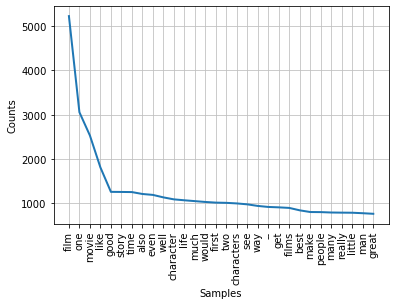

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
# plot the frequency distribution of the top 30 words from the set of positive reviews
plot_pos_freq = freq.plot(30, cumulative=False)
plot_pos_freq

In [32]:
# get the frequency distribution of the words in negative reviews
all_words = []

for review in clean_neg_reviews:
    for word in review:
         all_words.append(word)

In [33]:
# how many non-stopwords are found within the 1000 negative reviews?
len(all_words)

334483

In [34]:
# how many distinct non-stopwords are found across the 1000 negative reviews?
len(nltk.FreqDist(all_words))

28304

In [35]:
# what is the frequency distribution of the distinct words?
freq = nltk.FreqDist(all_words)
freq

FreqDist({'film': 4287, 'movie': 3246, 'one': 2800, 'like': 1888, 'even': 1386, 'time': 1168, 'good': 1163, 'would': 1090, 'get': 1052, 'bad': 1034, ...})

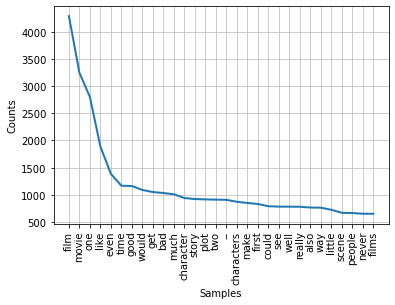

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [62]:
# plot the frequency distribution of the top 30 words from the set of negative reviews
plot_neg_freq = freq.plot(30, cumulative=False)
plot_neg_freq

## Case Study: Constructing a Sentiment Analysis Classifier


### Now that we have some insite into the content of the movie reviews, let's build a sentiment analysis classification model.

- In machine learning, we use the term __"feature"__ to describe a measurable property or characteristic of the data we are working with. In the case of our movie reviews, we can treat the words that comprise the content of the reviews as "features" for purposes of constructing an automated movie review classification algorithm. By analyzing the words used in what we know to be "positive" and "negative" reviews, we can determine which words are more likely to be used in each and thereby use that knowledge as the basis of our classification algorithm.


- For this example we'll make use of a __Naive Bayes__ classification algorithm that is provided within the NLTK library.


- __Naive Bayes__ is a machine learning algorithm that relies on Bayes theorem of probability to predict the classification of a new data item.


- __Naive Bayes__ assumes that the features we may find within a data set are unrelated to each other, i.e., the presence or abscence of any given feature within a data item does not influence the presence or abscence of any other feature within that same data item. 


- __Naive Bayes__ generates probabilities that reflect the likelihood that a given data item belongs to a particular classification (in our case, is a movie review __positive__ or __negative__?).  The class having the highest probability is assumed to be the most likely classification for the given data item.


- A discussion of __Naive Bayes__ can be found here: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/


- Another good summary of __Naive Bayes__: https://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/


We'll base our example on the approach used here: http://blog.chapagain.com.np/python-nltk-sentiment-analysis-on-movie-reviews-natural-language-processing-nlp/


We start by defining a function that will extract features from each movie review and then generate a dictionary object to be used by the NLTK Naive Bayes classification function.

In [37]:
# load the string library: will be used to help remove punctuation
import string

# feature extractor function
def feature_extractor(words):
    ''' this function removes English language stop words + punctuation from 
    a provided list of character strings and then creates a dictionary using
    the remaining words. The dictionary is comprised of key:value pairs wherein
    the key is a word from the list and the value is the Python keyword True. The True
    keyword MUST be used as the value to enable the use of the NLTK naive bayes classifier function.'''
    
    # define a new list to store the words we will retain from the 'words' list
    words_clean = []
 
    # iterate through each word in the list
    for word in words:
        # convert all characters to lowercase for consistency
        word = word.lower()
        
        # if the word is not a stop word and is not a punctuation character add it to clean word list
        # note that the list 'en_stops' was defined above in the section discussing stopwords        
        if word not in en_stops and word not in string.punctuation:
            words_clean.append(word)
    
    words_dictionary = dict([word, True] for word in words_clean)
    
    return words_dictionary

In [38]:
# gather the positive reviews together
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)

In [39]:
# gather the negative reviews together
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append(words)

In [40]:
# positive reviews feature set
pos_reviews_set = []
for words in pos_reviews:
    pos_reviews_set.append((feature_extractor(words), 'pos'))
    
# negative reviews feature set
neg_reviews_set = []
for words in neg_reviews:
    neg_reviews_set.append((feature_extractor(words), 'neg'))

In [41]:
# import the 'shuffle' function: we will randomize the order of the reviews 
from random import shuffle 
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)

# take 200 positive + 200 negative reviews to create a testing data set
test_set = pos_reviews_set[:200] + neg_reviews_set[:200]
# randomize the testing data set
shuffle(test_set)

# use the rest of the reviews for the training data set
train_set = pos_reviews_set[200:] + neg_reviews_set[200:]
# randomize the training data set
shuffle(train_set)

In [42]:
# load the naive bayes classifier + the classify library
from nltk import classify
from nltk import NaiveBayesClassifier
 
# train the Naive Bayes classifier using a training set
classifier = NaiveBayesClassifier.train(train_set)

# now apply the naive bayes classifier to the test data set and check the accuracy of the result
accuracy = classify.accuracy(classifier, test_set)
print(accuracy)

0.6925


In [43]:
# display the 30 most informative features as determined by the Naive Bayes classifier
print (classifier.show_most_informative_features(30))

Most Informative Features
             outstanding = True              pos : neg    =     14.7 : 1.0
                   sucks = True              neg : pos    =     13.0 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
                  elliot = True              pos : neg    =     10.3 : 1.0
                 insipid = True              neg : pos    =     10.3 : 1.0
              unbearable = True              neg : pos    =     10.3 : 1.0
               stupidity = True              neg : pos    =      9.8 : 1.0
                  avoids = True              pos : neg    =      9.7 : 1.0
            construction = True              pos : neg    =      9.7 : 1.0
                     dud = True              neg : pos    =      9.7 : 1.0
             wonderfully = True              pos : neg    =      9.5 : 1.0
               insulting = True              neg : pos    =      9.0 : 1.0
                  inject = True              neg : pos    =      9.0 : 1.0

The 'most informative' features found by the Naive Bayes classifier are shown above. The output also shows the magnitude of the probability of a given feature being either positive or negative relative to the alternative. For example, the word "ludicrous is many times more likely to be contained in a negative review than in a positive review.

### Applying our sentiment classifier to a "new" movie review

We can test our sentiment classifier by submitting our own reviews to it and observing the classifications it applies to them.

Let's start with a negative movie review:

In [44]:
review_bad = '''
 
It would be impossible to sum up all the stuff that's wrong with this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with the most unnatural laugh you're ever likely to hear; an ex-dope addict martian with tics; kid actors who make sure every syllable of their lines are slowly and caaarreee-fulll-yyy prrooo-noun-ceeed; a newspaper headline stating that Santa's been "kidnaped", and a giant robot. Yes, you read that right. A giant robot.
 
The worst acting job in here must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. Could they be *more* trembling? I know this was the sixties and everyone was doped up, but still.
'''
print(review_bad )


 
It would be impossible to sum up all the stuff that's wrong with this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with the most unnatural laugh you're ever likely to hear; an ex-dope addict martian with tics; kid actors who make sure every syllable of their lines are slowly and caaarreee-fulll-yyy prrooo-noun-ceeed; a newspaper headline stating that Santa's been "kidnaped", and a giant robot. Yes, you read that right. A giant robot.
 
The worst acting job in here must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. Could they be *more* trembling? I know this was the sixties and everyone was doped up, but still.



In [45]:
# import a word tokenizer from NLTK
from nltk.tokenize import word_tokenize

# tokenize the bad review.
words = word_tokenize(review_bad)

# display the tokens
print(words)

['It', 'would', 'be', 'impossible', 'to', 'sum', 'up', 'all', 'the', 'stuff', 'that', "'s", 'wrong', 'with', 'this', 'film', ',', 'so', 'I', "'ll", 'break', 'it', 'down', 'into', 'what', 'I', 'remember', 'most', 'strongly', ':', 'a', 'man', 'in', 'an', 'ingeniously', 'fake-looking', 'polar', 'bear', 'costume', '(', 'funnier', 'than', 'the', '``', 'bear', "''", 'from', 'Hercules', 'in', 'New', 'York', ')', ';', 'an', 'extra', 'with', 'the', 'most', 'unnatural', 'laugh', 'you', "'re", 'ever', 'likely', 'to', 'hear', ';', 'an', 'ex-dope', 'addict', 'martian', 'with', 'tics', ';', 'kid', 'actors', 'who', 'make', 'sure', 'every', 'syllable', 'of', 'their', 'lines', 'are', 'slowly', 'and', 'caaarreee-fulll-yyy', 'prrooo-noun-ceeed', ';', 'a', 'newspaper', 'headline', 'stating', 'that', 'Santa', "'s", 'been', '``', 'kidnaped', "''", ',', 'and', 'a', 'giant', 'robot', '.', 'Yes', ',', 'you', 'read', 'that', 'right', '.', 'A', 'giant', 'robot', '.', 'The', 'worst', 'acting', 'job', 'in', 'here'

In [46]:
# use our feature extractor function to remove stopwords + punctuation + create the feature object
features = feature_extractor(words)

# apply the classifier to the features we've extracted from the review
classifier.classify(features)

'pos'

The review was correctly classified as __negative__. However, the wording used within the review itself is overtly negative.

Let's see what happens with a less-scathing version of the review:

In [47]:
review_lessbad = '''
 
There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; a newspaper headline declaring that Santa has been "kidnapped", and a giant robot.
 
The least appealing acting job in the film must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's?
'''
print(review_lessbad )


 
There were some things I didn't like about this film. Here's what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; a newspaper headline declaring that Santa has been "kidnapped", and a giant robot.
 
The least appealing acting job in the film must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's?



In [48]:
# tokenize the revised review
words = word_tokenize(review_lessbad)

# apply the feature_extractor function to remove stopwords + punctuation + create the features object
features = feature_extractor(words)

# apply the classifier to the features we've extracted from the review
classifier.classify(features)

'pos'

As we can see, just a few simple adjustments to the wording of the negative review causes the classifier to identify it as a __positive__ review even though we as readers can easily determine that the review is negative.

### Why is our classifier not performing as expected?

- The number of sample reviews we are using to train the classifier may be too small. Constructing a robust sentiment classification model can require the use of tens of thousands of sample text items.